In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('IRIS.csv')

In [7]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
shuffled_data = data.sample(frac = 1)

In [23]:
shuffled_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
104,6.5,3.0,5.8,2.2,Iris-virginica
50,7.0,3.2,4.7,1.4,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor
20,5.4,3.4,1.7,0.2,Iris-setosa


In [30]:
X= shuffled_data.drop('species', axis =1)
Y = shuffled_data['species']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.2, random_state = 0)

<ipython-input-25-6dff3e691314>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pl.pcolormesh(xx, yy, Z)


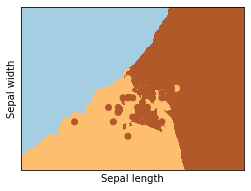

In [25]:
from sklearn import neighbors, datasets
import pylab as pl

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. 
Y = iris.target


h = .02 # step size in the mesh

knn=neighbors.KNeighborsClassifier()

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

# Plot also the training points
pl.scatter(X[:,0], X[:,1],c=Y )
pl.xlabel('Sepal length')
pl.ylabel('Sepal width')

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_model =  KNeighborsClassifier(n_neighbors = 3)

In [38]:
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
y_pred = knn_model.predict(X_test)

In [1]:
y_pred

NameError: name 'y_pred' is not defined

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 9,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]], dtype=int64)

In [52]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)# Recall

0.9333333333333333

In [53]:
from sklearn.metrics import recall_score
recall_score(Y_test, y_pred, average=None)# Precision

array([1.        , 0.875     , 0.92307692])

In [58]:
from sklearn.metrics import precision_score
precision_score(Y_test, y_pred, average=None)

array([1.        , 0.875     , 0.92307692])

In [61]:
#SVC

In [62]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [63]:
y_predSVC = classifier.predict(X_test)

In [64]:
y_predSVC

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_predSVC)

array([[ 9,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 13]], dtype=int64)

In [67]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_predSVC)# Recall

1.0

In [68]:
from sklearn.metrics import recall_score
recall_score(Y_test, y_predSVC, average=None)# Precision

array([1., 1., 1.])

In [69]:
from sklearn.metrics import precision_score
precision_score(Y_test, y_predSVC, average=None)

array([1., 1., 1.])